This is the notebook of Jonah Librande. Formatting notes: as per comments I now am tagging which question I respond to at every point. Additonally, I always place my commentary ABOVE any graphs related to the question, such that my graphs related to 1A are directly below the markdown cell which describes them.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

c = ['red', 'orange', 'yellow', 'green', 'blue', 'purple'] #color array for graphing

def convX(mod, base, x):
    ret = np.convolve(mod, base)
    for i in range(x - 1):
        ret = np.convolve(ret, base)
    return ret

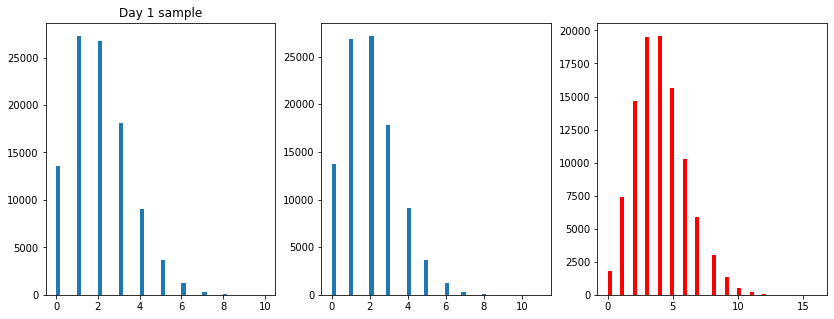

In [35]:
day1 = st.poisson.rvs(2, size = 10**5)
day2 = st.poisson.rvs(2, size = 10**5)
total = np.add(day1, day2)
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(14, 5)
ax[0].hist(day1, bins=50)
ax[0].set_title('Day 1 sample')
ax[1].hist(day2, bins=50)
ax[1].set_title('Day 2 sample')
ax[2].hist(total, bins=50, color='red')
ax[2].set_title('Sum across samples')
plt.show()

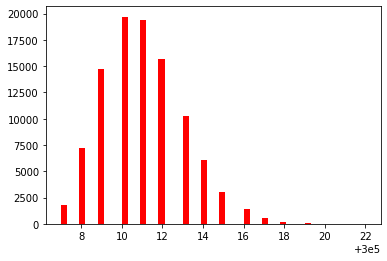

In [3]:
for i in range(3):
    total = np.add(total, st.poisson.rvs(2, 10**5))
plt.cla()
plt.hist(total, bins=50, color='r')
plt.show()

ValueError: operands could not be broadcast together with shapes (1000,) (2001,) (1000,) 

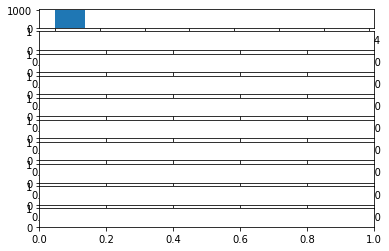

In [39]:
def standardize(axe, xl, yl):
    for a in axe:
        a.set_xlabel(xl)
        a.set_ylabel(yl)
    
n = 10
fig, ax = plt.subplots(n, 1)
psum = st.poisson.pmf(np.linspace(0, 5, 1000), mu=2)
ax[0].hist(sums)
ax[0].set_title('')
for i in range(1, n):
    psum = np.convolve(st.poisson.pmf(np.linspace(0, 5 * (i + 1), 1000 * (i + 1) + 1), mu=2)
    ax[i].plot(np.linspace(0, 5 * (i + 1), 1000 * (i + 1) + 1), sums, 'o')
    ax[i].set_title('Sum over {} Poisson distributions'.format(str(i + 1)))
fig.set_size_inches(8, 70)
standardize(ax, "measured value", "counts")
plt.show()

1A. We seek to find the pdf of a sum of Poisson distributed random variables - we are free to choose the mean of it, so I choose a mean of 2. We are additonally required to pick a number of emissions for our hypothetical source; I choose the value for it of Y = 4. To find our summed pdf, we note that the pdf of a sum of random variables is the convolution of the individual pdfs, and we convolve the Poisson distribution's pmf with itself n times to get the probability distribution of the sum. We do so below, and note two features: first, the distribution flattens as we sum, and second, the distribution migrates to the right as we sum.

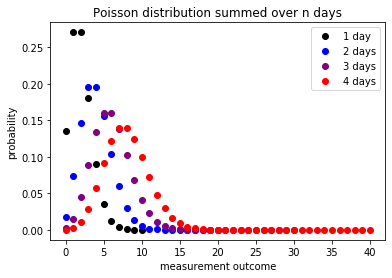

In [53]:
plt.cla()
probs = st.poisson.pmf(np.linspace(0, 10, 11), 2)
plt.plot(np.linspace(0, 10, 11), probs, 'o', color='black', label='1 day')
pee = np.convolve(probs, probs)
plt.plot(np.linspace(0, 20, 21), pee, 'o', color='blue', label='2 days')
poo = np.convolve(pee, probs)
plt.plot(np.linspace(0, 30, 31), poo, 'o', color='purple', label='3 days')
paa = np.convolve(poo, probs)
dom = np.linspace(0, 40, 41)
plt.plot(dom, paa, 'o', color = 'red', label='4 days')
plt.title('Poisson distribution summed over n days')
plt.xlabel('measurement outcome')
plt.ylabel('probability')
plt.legend()
plt.show()

1B. To check that the distribution is still Poisson after 5 days of summing, we convolve 4 times. This appears to be Poisson, and formalism justifies it: This distribution counts the likelihood of counting N events over 5 days, and the counting of such events is exactly described by a Poisson distribution. 

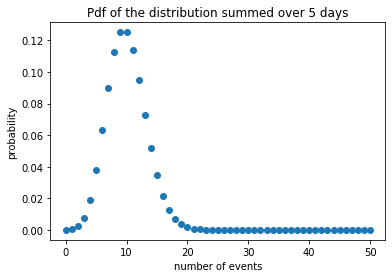

In [55]:
plt.cla()
pao = convX(probs, probs, 4)
plt.plot(np.linspace(0, 50, 51), pao, 'o')
plt.title("Pdf of the distribution summed over 5 days")
plt.xlabel('number of events')
plt.ylabel('probability')
plt.show()

1C. Now, we seek to average, not sum. We note that averaging is equivalent to a rescaling of our x axis from the summed case, and that our above argument applies to not just n=5, but to any finite value of n. Thus, we expect that any sum of identical Poisson variables will be Poisson, and a rescaling of it will then also be Poisson. As noted in class, a Poisson distribution is normally distributed (in the continuum limit), so as convolution effectively gives us more data points, we expect our distribution will begin to look more closely normal as we increase the number of terms contributing to our average. This is what the data appears to yield, noting that we get a nicer parabolic arc of our data points as the number of summed days increases.

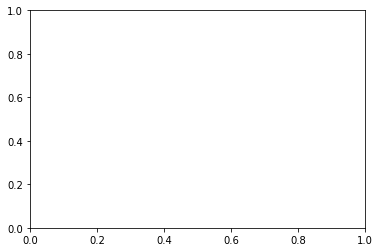

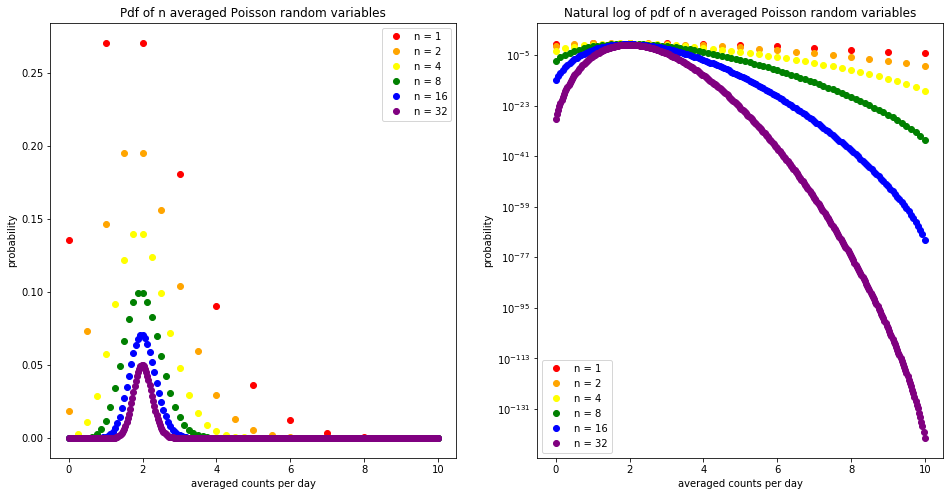

In [58]:
plt.cla()
probs = st.poisson.pmf(np.linspace(0, 10, 11), 2)
P1 = np.convolve(probs, probs)
P2 = convX(P1, probs, 2)
P3 = convX(P2, probs, 4)
P4 = convX(P3, probs, 8)
P5 = convX(P4, probs, 16)
P = [probs, P1, P2, P3, P4, P5]
fig, ax = plt.subplots(1, 2)
for i in range(6):
    ax[0].plot(np.linspace(0, 10, 10 * (2**i) + 1), P[i], 'o', color=c[i], label='n = {}'.format(str(2**i)))
    ax[1].plot(np.linspace(0, 10, 10 * (2**i) + 1), P[i], 'o', color=c[i], label='n = {}'.format(str(2**i)))

ax[1].set_yscale('log')
ax[0].set_title('Pdf of n averaged Poisson random variables')
ax[1].set_title('Natural log of pdf of n averaged Poisson random variables')

ax[0].set_xlabel('averaged counts per day')
ax[1].set_xlabel('averaged counts per day')
ax[0].set_ylabel('probability')
ax[1].set_ylabel('probability')

fig.set_size_inches(16, 8)
ax[0].legend()
ax[1].legend()
plt.show()

1D. I choose N = 5, and we suppose we have then seen N * Y = 20 events. We first generate the pdf for the sum of 5 days, by convolving 4 times the pdf of one day. To "integrate" it, we sum the points that appear in our array up to our candidate number of events - these points are the probability of the given index being observed. As we want the sigma, we really want the probability the background produces an event of probability greater than our candidate event, so we use that the pdf we generate by convolution will be normalized, and take the difference of 1 and the sum as the relevant probability. We then find the sigma of that probability.

In [59]:
five = convX(probs, probs, 4)
candidate = 20

su = 0
for i in range(candidate + 1): #is this really correct range? do i sum to n inclusive, or exclusive?
    su += five[i]
odds = 1 - su
sig = st.norm.ppf(su)
print('We calculate a significance for this measurement of {} sigma.'.format(sig))

We calculate a significance for this measurement of 2.9445706161150875 sigma.


2A. I choose the Rayleigh distribution. There is not much to comment on the distribution graphing as we average, but I do point out my choice of normalizing the initial array of the pdf - the discretization of the distribution is bound to introduce errors, and to eliminate ones due to scale-shifting as we convolve, I have chosen to normalize, and then when graphing the distributions, I multiply by a factor of the number of convolutions each has been through. This is because the act of convolving otherwise unnaturally depresses the array after any appreciable number of convolutions, and this multiplication gives more reasonable values for the distribution - specifically, the area under each appears to be identical with this method, which is certainly required for any series of graphs which, when continuous, ought to integrate to unity.

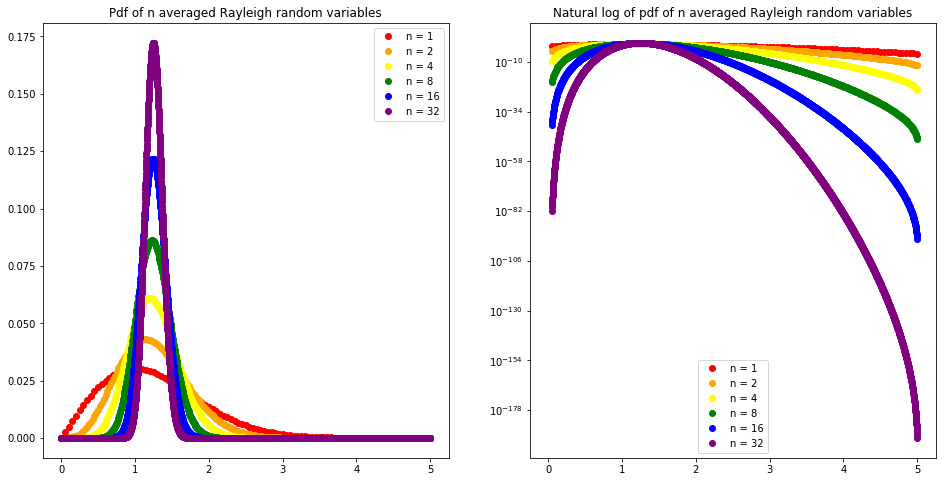

In [33]:
binNum = 100
prayl = st.rayleigh.pdf(np.linspace(0, 5, binNum + 1))
prayl = (1 / sum(prayl)) * prayl #normalize our approximation
R1 = np.convolve(prayl, prayl)
R2 = convX(R1, prayl, 2)
R3 = convX(R2, prayl, 4)
R4 = convX(R3, prayl, 8)
R5 = convX(R4, prayl, 16)
R = [prayl, R1, R2, R3, R4, R5]
fig, ax = plt.subplots(1, 2)
for i in range(6):
    ax[0].plot(np.linspace(0, 5, 100 * (2**i) + 1), (2**i) * R[i], 'o', color=c[i], label='n = {}'.format(str(2**i)))
    ax[1].plot(np.linspace(0, 5, 100 * (2**i) + 1), (2**i) * R[i], 'o', color=c[i], label='n = {}'.format(str(2**i)))

ax[1].set_yscale('log')
ax[0].set_title('Pdf of n averaged Rayleigh random variables')
ax[1].set_title('Natural log of pdf of n averaged Rayleigh random variables')

ax[0].set_xlabel('average over measurements')
ax[1].set_xlabel('average over measurements')
ax[0].set_ylabel('probability')
ax[1].set_ylabel('probability')

fig.set_size_inches(16, 8)
ax[0].legend()
ax[1].legend()
plt.show()

2B. The central limit theorem certainly assured us that the average of iid random variables approaches a normal distribution as the number of variables gets large, and this appears to support the theorem; the ditribution becomes more closely symmetric as the number of samples increases, and takes on the characteristic "bell curve" shape. Additionally, its log appears more parabolic for larger n, although a bit lopsided, which we expect would in turn become more symmetric as n becomes even larger. We can take this as evidence that the central limit theorem is indeed a theorem on a limit: the distribution need not be perfectly normal for any finite number of convolutions, only at infinity, and we certainly see evidence of an approach to a normal distribution in the increasing symmetry. 

3A. We suppose our background distribution is found to be standard normal, or a normal distribution centered at 0, with standard deviation 1. We suppose our signal candidate has a value of 3.78. In this case, our background represents brightness, so we expect that a meaningful signal will be brighter than expected. An unusually dark pixel is not going to represent anything of interest, as even a black hole - which one expects to be dark - will lens light. Instead, as we are looking for some sort of celestial event, we consider very bright events as being signal-like. We thus only look at probabilities of events with strictly higher sigma than our event, and integrate down to negative infinity below it.

In [65]:
#Assume stddev = 1, and signal is of strength 3.78
candidate = 4.78
sdev = 1
pv1 = 1 - st.norm.cdf(candidate, loc = 0, scale = sdev)
sigv1 = st.norm.ppf(1 - pv1)
print("The probability of the background producing this signal is {}, and the associated sigma is {}.".format(pv1, sigv1))

The probability of the background producing this signal is 8.764759729107396e-07, and the associated sigma is 4.780000000004236.


3B and 3C. We now assume that every pixel in the has a brightness pulled from a standard normal distribution, as we had in the previous part. Given that, our background is then the average of the distributions of each pixel. We are then asking, what is the probability that our signal candidate be produced by this background, that is, the probability that any of the 10,000 pixels produce our signal. This differs from the previous part in that we are now asking about a large average over all pixels, and there are many more places we could receieve a signal from. We can also think of this as asking what the probability over 10,000 trials is that a more signal-like event occurs. We can deduce the pdf to be the 10,000-fold convolution of the pdf from part 1, rescaled appropriately. However, my computer refuses to perform such a convolution, so we note that in the tails of the distribution, this convolution will approximately be equal to, after normalization, multiplication of the base distribution by 10,000, so as the probability from the previous part is very small, it is just an integral over this tail region to infinity, and as the integral is linear, we get that our new probability will be to a good approximation 10,000 times the previous probability. This allows us to find a sigma as above.

In [74]:
pv2 = pv1 * 10**4
sigv2 = st.norm.ppf(1 - pv2)
print("We find a significance of {} sigma for this event.".format(sigv2))

We find a significance of 2.3754088896842633 sigma for this event.


4A. For this part, since we chose the background to be a standard normal distribution, we have that a 5 sigma result is simply, well, 5 units brighter than the average.

In [80]:
pro = 1 - st.norm.cdf(5)
signal = st.norm.ppf(1 - pro, loc = 0, scale=sdev)
print("In version 1, we need a signal of magnitude at least {}.".format(str(signal)))

In version 1, we need a signal of magnitude at least 4.999999999970176.


4B. Here, we use the same approximation as above, and run it in reverse: if we have some signal from the version 2 distribution which has a 5 sigma p value, then the same measurement in the version 1 distribution would have a p value which is 10,000 times smaller, and from this, we can deduce the signal.

In [82]:
pro2 = pro * (10 ** -4)
signal2 = st.norm.ppf(1 - pro2, loc = 0, scale=sdev)
print("In version 2, we need a signal of magnitude at least {}.".format(signal2))

In version 2, we need a signal of magnitude at least 6.550537486891655.


4C. The increase in brightness of the 5 sigma signal is not enourmous - it is an increase in magnitude of about 33%. This seems very small compared to the huge increase in trials, but it is reasonable once we consider the fact that the higher magnitude outcomes are still exponentially suppressed by the distributions. As noted above when talking about approximating our distribution, the 10,000 trials does increase the area contained in the tails compared to the single-trial distribution, but this is a region that already contains extremely little of the total area enclosed by the graph of the distribution. The effect of the averaging is then very minor in altering the distribution.

4D.